Example notebook showing how to use the nested sampler

In [1]:
import os
import sys
import torch
from getdist import plots, MCSamples
import getdist
import numpy as np

In [2]:
path = os.path.realpath(os.path.join(os.getcwd(), '../..'))
sys.path.insert(0, path)

In [3]:
from nnest import NestedSampler
from nnest.likelihoods import *

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [5]:
# Likelihood + prior
#like = Himmelblau(2)
#transform = lambda x: 5*x
like = Rosenbrock(10)
transform = lambda x: 5*x
#like = Gaussian(2, 0.9)
#transform = lambda x: 3*x
#like = Eggbox(2)
#transform = lambda x: 5*np.pi*x
#like = GaussianShell(2)
#transform = lambda x: 5*x
#like = GaussianMix(2)
#transform = lambda x: 5*x

In [6]:
sampler = NestedSampler(like.x_dim, like, transform=transform, num_live_points=1000, hidden_dim=16, num_blocks=3, flow='spline')

Creating directory for new run logs/test/run39
[nnest.trainer] [INFO] SingleSpeedSpline(
  (flow): NormalizingFlow(
    (flows): ModuleList(
      (0): ActNorm()
      (1): Invertible1x1Conv()
      (2): NSF_CL(
        (f1): MLP(
          (net): Sequential(
            (0): Linear(in_features=5, out_features=16, bias=True)
            (1): LeakyReLU(negative_slope=0.2)
            (2): Linear(in_features=16, out_features=16, bias=True)
            (3): LeakyReLU(negative_slope=0.2)
            (4): Linear(in_features=16, out_features=16, bias=True)
            (5): LeakyReLU(negative_slope=0.2)
            (6): Linear(in_features=16, out_features=115, bias=True)
          )
        )
        (f2): MLP(
          (net): Sequential(
            (0): Linear(in_features=5, out_features=16, bias=True)
            (1): LeakyReLU(negative_slope=0.2)
            (2): Linear(in_features=16, out_features=16, bias=True)
            (3): LeakyReLU(negative_slope=0.2)
            (4): Linear(in_f

In [7]:
sampler.run(strategy=['rejection_prior', 'mcmc'])

[nnest.sampler] [INFO] MCMC steps [50]
[nnest.sampler] [INFO] Initial scale [0.6325]
[nnest.sampler] [INFO] Volume switch [-1.0000]
[nnest.sampler] [INFO] Step [0] loglstar [-3.4611e+05] max logl [-5.9317e+03] logz [-3.4611e+05] vol [1.00000e+00] ncalls [1001] mean calls [0.0000]
[nnest.sampler] [INFO] Step [200] loglstar [-1.7580e+05] max logl [-5.9317e+03] logz [-1.7580e+05] vol [8.18731e-01] ncalls [1215] mean calls [1.1000]
[nnest.sampler] [INFO] Step [400] loglstar [-1.4460e+05] max logl [-5.9317e+03] logz [-1.4461e+05] vol [6.70320e-01] ncalls [1473] mean calls [1.4000]
[nnest.sampler] [INFO] Step [600] loglstar [-1.2492e+05] max logl [-5.9317e+03] logz [-1.2493e+05] vol [5.48812e-01] ncalls [1777] mean calls [1.7000]
[nnest.sampler] [INFO] Step [800] loglstar [-1.0860e+05] max logl [-5.9317e+03] logz [-1.0861e+05] vol [4.49329e-01] ncalls [2175] mean calls [2.8000]
[nnest.sampler] [INFO] Step [1000] loglstar [-9.6207e+04] max logl [-5.1524e+03] logz [-9.6215e+04] vol [3.67879e-0

[nnest.sampler] [INFO] Step [6800] loglstar [-8.1809e+03] maxlogl [-5.4193e+02] logz [-8.1942e+03] vol [1.11378e-03] ncalls [160229] scale [0.3008]
[nnest.trainer] [INFO] Number of training samples [1000]
[nnest.trainer] [INFO] Training jitter [0.0485]
[nnest.trainer] [INFO] Epoch [1] train loss [0.0134] validation loss [0.0103]
[nnest.trainer] [INFO] Epoch [53] ran out of patience
[nnest.trainer] [INFO] Best epoch [3] validation loss [0.0097] train time (s) [19.9540]]
[nnest.sampler] [INFO] Acceptance [0.5640] min ESS [2.9880] max ESS [9.6553] average jump [0.1244]
[nnest.sampler] [INFO] Step [7000] loglstar [-7.5988e+03] maxlogl [-5.4193e+02] logz [-7.6121e+03] vol [9.11882e-04] ncalls [167864] scale [0.2145]
[nnest.sampler] [INFO] Acceptance [0.5300] min ESS [2.6770] max ESS [7.9142] average jump [0.1241]
[nnest.sampler] [INFO] Step [7200] loglstar [-7.0754e+03] maxlogl [-5.4193e+02] logz [-7.0892e+03] vol [7.46586e-04] ncalls [176117] scale [0.2287]
[nnest.sampler] [INFO] Acceptanc

[nnest.trainer] [INFO] Best epoch [7] validation loss [-0.0403] train time (s) [21.7799]]
[nnest.sampler] [INFO] Acceptance [0.5360] min ESS [4.5170] max ESS [17.8169] average jump [0.0931]
[nnest.sampler] [INFO] Step [12000] loglstar [-1.2507e+03] maxlogl [-1.9393e+02] logz [-1.2683e+03] vol [6.14421e-06] ncalls [359689] scale [0.2569]
[nnest.sampler] [INFO] Acceptance [0.5400] min ESS [3.7656] max ESS [14.9908] average jump [0.0875]
[nnest.sampler] [INFO] Step [12200] loglstar [-1.1715e+03] maxlogl [-1.9393e+02] logz [-1.1890e+03] vol [5.03046e-06] ncalls [367238] scale [0.1394]
[nnest.sampler] [INFO] Acceptance [0.5320] min ESS [2.8719] max ESS [13.4080] average jump [0.0845]
[nnest.sampler] [INFO] Step [12400] loglstar [-1.0954e+03] maxlogl [-1.8747e+02] logz [-1.1140e+03] vol [4.11859e-06] ncalls [374983] scale [0.2498]
[nnest.sampler] [INFO] Acceptance [0.5880] min ESS [2.4388] max ESS [9.5460] average jump [0.0778]
[nnest.sampler] [INFO] Step [12600] loglstar [-1.0245e+03] maxlo

[nnest.sampler] [INFO] Step [17000] loglstar [-2.8817e+02] maxlogl [-4.5922e+01] logz [-3.0953e+02] vol [4.13994e-08] ncalls [545702] scale [0.2490]
[nnest.sampler] [INFO] Acceptance [0.4740] min ESS [2.2318] max ESS [18.8039] average jump [0.0535]
[nnest.sampler] [INFO] Step [17200] loglstar [-2.7304e+02] maxlogl [-4.5922e+01] logz [-2.9438e+02] vol [3.38949e-08] ncalls [553316] scale [0.3748]
[nnest.sampler] [INFO] Acceptance [0.5580] min ESS [5.3318] max ESS [35.9814] average jump [0.0507]
[nnest.sampler] [INFO] Step [17400] loglstar [-2.6012e+02] maxlogl [-4.5922e+01] logz [-2.8147e+02] vol [2.77508e-08] ncalls [560787] scale [0.2339]
[nnest.sampler] [INFO] Acceptance [0.5820] min ESS [4.2009] max ESS [12.0693] average jump [0.0493]
[nnest.sampler] [INFO] Step [17600] loglstar [-2.4757e+02] maxlogl [-4.5922e+01] logz [-2.6934e+02] vol [2.27205e-08] ncalls [568476] scale [0.1816]
[nnest.sampler] [INFO] Acceptance [0.6920] min ESS [5.6413] max ESS [22.9391] average jump [0.0284]
[nne

[nnest.sampler] [INFO] Acceptance [0.5460] min ESS [1.0790] max ESS [24.0346] average jump [0.0299]
[nnest.sampler] [INFO] Step [22400] loglstar [-8.6209e+01] maxlogl [-2.9627e+01] logz [-1.1140e+02] vol [1.86984e-10] ncalls [751018] scale [0.1139]
[nnest.sampler] [INFO] Acceptance [0.5920] min ESS [8.0975] max ESS [51.0000] average jump [0.0300]
[nnest.sampler] [INFO] Step [22600] loglstar [-8.2718e+01] maxlogl [-2.9627e+01] logz [-1.0817e+02] vol [1.53089e-10] ncalls [758466] scale [0.1656]
[nnest.sampler] [INFO] Acceptance [0.6340] min ESS [6.7245] max ESS [51.0000] average jump [0.0179]
[nnest.sampler] [INFO] Step [22800] loglstar [-7.9212e+01] maxlogl [-2.2025e+01] logz [-1.0479e+02] vol [1.25339e-10] ncalls [765996] scale [0.2136]
[nnest.trainer] [INFO] Number of training samples [1000]
[nnest.trainer] [INFO] Training jitter [0.0101]
[nnest.trainer] [INFO] Epoch [1] train loss [-0.1453] validation loss [-0.1479]
[nnest.trainer] [INFO] Epoch [52] ran out of patience
[nnest.trainer

[nnest.sampler] [INFO] Step [27600] loglstar [-3.2526e+01] maxlogl [-1.0435e+01] logz [-6.1644e+01] vol [1.03151e-12] ncalls [950455] scale [0.4392]
[nnest.sampler] [INFO] Acceptance [0.4860] min ESS [6.7622] max ESS [51.0000] average jump [0.0191]
[nnest.sampler] [INFO] Step [27800] loglstar [-3.1513e+01] maxlogl [-1.0435e+01] logz [-6.0763e+01] vol [8.44527e-13] ncalls [958392] scale [0.2211]
[nnest.trainer] [INFO] Number of training samples [1000]
[nnest.trainer] [INFO] Training jitter [0.0061]
[nnest.trainer] [INFO] Epoch [1] train loss [-0.1936] validation loss [-0.1968]
[nnest.trainer] [INFO] Epoch [100] train loss [-0.2034] validation loss [-0.1988]
[nnest.trainer] [INFO] Epoch [145] ran out of patience
[nnest.trainer] [INFO] Best epoch [95] validation loss [-0.1995] train time (s) [70.7922]]
[nnest.sampler] [INFO] Acceptance [0.4860] min ESS [7.6183] max ESS [51.0000] average jump [0.0235]
[nnest.sampler] [INFO] Step [28000] loglstar [-3.0428e+01] maxlogl [-1.0435e+01] logz [-5

[nnest.sampler] [INFO] Step [32800] loglstar [-1.5288e+01] maxlogl [-4.8657e+00] logz [-4.8316e+01] vol [5.69038e-15] ncalls [1151401] scale [0.2095]
[nnest.trainer] [INFO] Number of training samples [1000]
[nnest.trainer] [INFO] Training jitter [0.0038]
[nnest.trainer] [INFO] Epoch [1] train loss [-0.2413] validation loss [-0.2455]
[nnest.trainer] [INFO] Epoch [85] ran out of patience
[nnest.trainer] [INFO] Best epoch [35] validation loss [-0.2488] train time (s) [36.9057]]
[nnest.sampler] [INFO] Acceptance [0.6700] min ESS [3.8790] max ESS [20.3432] average jump [0.0133]
[nnest.sampler] [INFO] Step [33000] loglstar [-1.4921e+01] maxlogl [-4.8657e+00] logz [-4.8074e+01] vol [4.65889e-15] ncalls [1159352] scale [0.2054]
[nnest.sampler] [INFO] Acceptance [0.5420] min ESS [6.1998] max ESS [16.3988] average jump [0.0197]
[nnest.sampler] [INFO] Step [33200] loglstar [-1.4542e+01] maxlogl [-4.8657e+00] logz [-4.7847e+01] vol [3.81437e-15] ncalls [1167153] scale [0.2387]
[nnest.sampler] [INF

[nnest.trainer] [INFO] Training jitter [0.0024]
[nnest.trainer] [INFO] Epoch [1] train loss [-0.2917] validation loss [-0.2963]
[nnest.trainer] [INFO] Epoch [89] ran out of patience
[nnest.trainer] [INFO] Best epoch [39] validation loss [-0.3004] train time (s) [39.1734]]
[nnest.sampler] [INFO] Acceptance [0.5100] min ESS [7.6825] max ESS [51.0000] average jump [0.0232]
[nnest.sampler] [INFO] Step [38000] loglstar [-7.5116e+00] maxlogl [-1.1575e+00] logz [-4.4636e+01] vol [3.13913e-17] ncalls [1360708] scale [0.1739]
[nnest.sampler] [INFO] Acceptance [0.4620] min ESS [16.7946] max ESS [51.0000] average jump [0.0222]
[nnest.sampler] [INFO] Step [38200] loglstar [-7.2819e+00] maxlogl [-1.1575e+00] logz [-4.4555e+01] vol [2.57010e-17] ncalls [1368611] scale [0.2465]
[nnest.sampler] [INFO] Acceptance [0.4980] min ESS [33.2600] max ESS [51.0000] average jump [0.0218]
[nnest.sampler] [INFO] Step [38400] loglstar [-7.0425e+00] maxlogl [-1.1575e+00] logz [-4.4478e+01] vol [2.10422e-17] ncalls 

[nnest.trainer] [INFO] Epoch [100] train loss [-0.3468] validation loss [-0.3482]
[nnest.trainer] [INFO] Epoch [200] train loss [-0.3484] validation loss [-0.3486]
[nnest.trainer] [INFO] Epoch [212] ran out of patience
[nnest.trainer] [INFO] Best epoch [162] validation loss [-0.3504] train time (s) [106.6622]]
[nnest.sampler] [INFO] Acceptance [0.5680] min ESS [9.1330] max ESS [51.0000] average jump [0.0181]
[nnest.sampler] [INFO] Step [43000] loglstar [-3.0162e+00] maxlogl [-7.4324e-01] logz [-4.3503e+01] vol [2.11513e-19] ncalls [1562091] scale [0.2786]
[nnest.sampler] [INFO] niter: 43180
 ncall: 1569099
 nsamples: 44180
 logz: -43.364 +/-  0.193
 h: 37.226


In [8]:
print(sampler.logz)

-43.363593444541415


In [9]:
mc = MCSamples(samples=sampler.samples, weights=sampler.weights, loglikes=-sampler.loglikes)

Removed no burn in


In [10]:
print(mc.getEffectiveSamples())
print(mc.getMargeStats())
print(mc.likeStats)

18714.95808885336
Marginalized limits: 0.68; 0.95; 0.99

parameter   mean           sddev          lower1         upper1         limit1 lower2         upper2         limit2 lower3         upper3         limit3 
param1      9.2942498E-01  2.6244553E-01  9.3568182E-01  1.0400492E+00  two    7.1014115E-01  1.1045941E+00  two   -9.8165318E-01  1.0898117E+00  two     p_{1}
param2      9.3502268E-01  1.5582903E-01  9.2683009E-01  1.0415066E+00  two    5.9880925E-01  1.1003050E+00  two    5.5421009E-02  1.0885581E+00  two     p_{2}
param3      8.9987233E-01  1.9995277E-01  9.0634676E-01  1.0434677E+00  two    8.6521282E-02  1.0999472E+00  two   -8.0397026E-04  1.1028576E+00  two     p_{3}
param4      8.5213000E-01  2.4753901E-01  8.7008819E-01  1.0486420E+00  two   -2.1320781E-02  1.0921656E+00  two   -5.7217502E-02  1.0812706E+00  two     p_{4}
param5      7.9267314E-01  2.9228390E-01  7.9540090E-01  1.0626390E+00  two   -3.6084414E-02  1.0922112E+00  two   -5.5718727E-02  1.0969761E+00  two

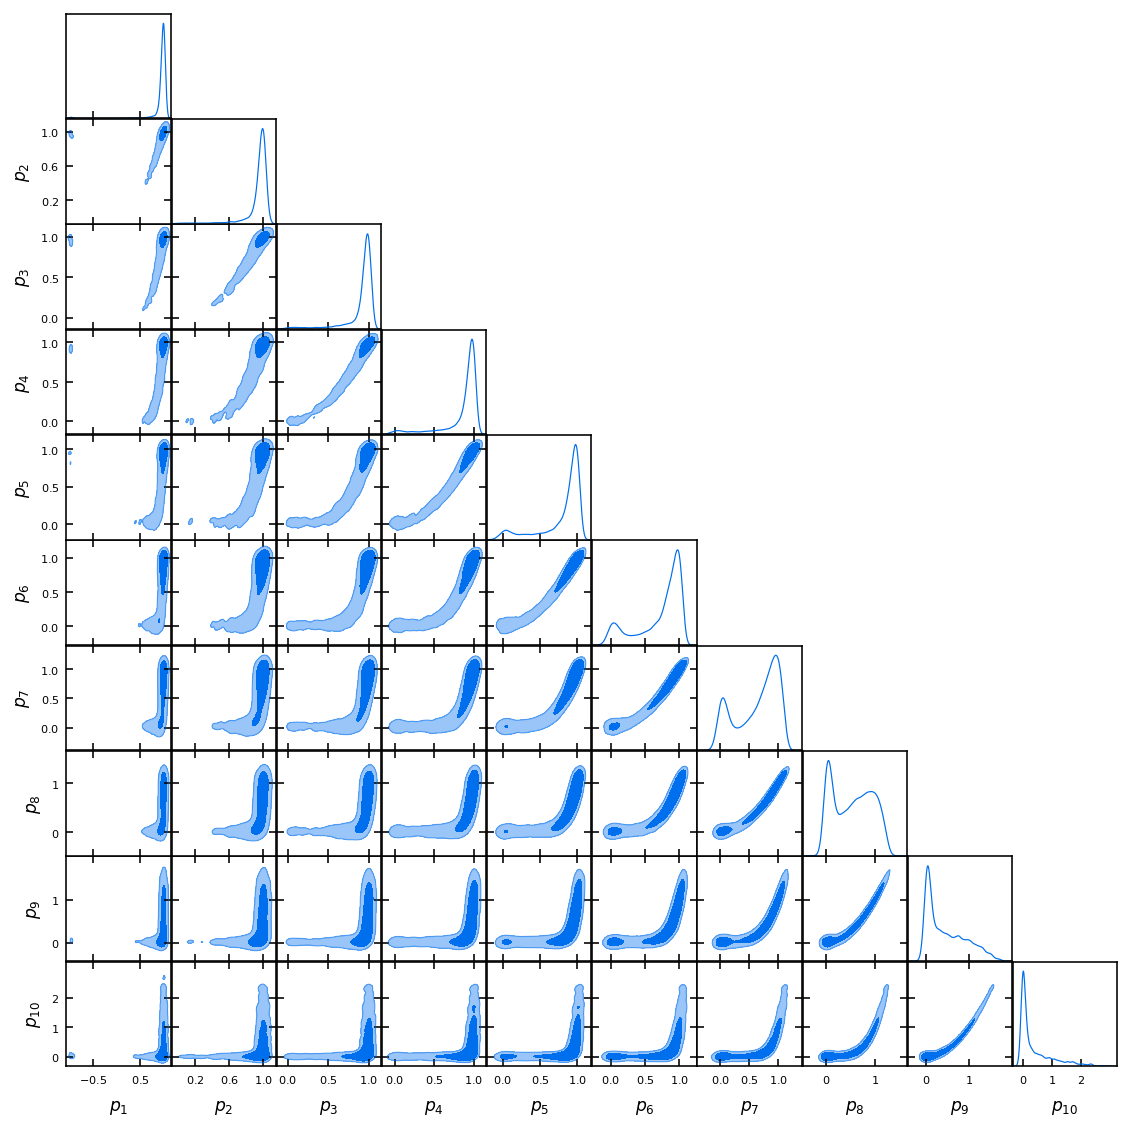

In [11]:
g = plots.getSubplotPlotter(width_inch=8)
g.triangle_plot(mc, filled=True)